In [21]:
import os
import pickle as pkl

import pandas as pd

from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats



def differential_expression_analysis(output_dir, count_matrix, meta_data):

    inference = DefaultInference(n_cpus=8)
    dds = DeseqDataSet(
        counts=count_matrix,
        metadata=meta_data,
        design_factors="condition",
        refit_cooks=True,
        inference=inference,
    )

    dds.deseq2()

    print(dds)
    print(dds.varm["dispersions"])
    print(dds.varm["LFC"])

    stat_res = DeseqStats(dds, inference=inference)
    print(stat_res.summary())
    return stat_res, dds





# B_C

In [4]:
count_matrix = pd.read_csv('count_matrix_diff_analysis.csv',index_col=0)
meta_data = pd.read_csv('meta_data_diff_analysis.csv',index_col=0)
meta_data = meta_data[meta_data.condition.isin(['B','C'])]
count_matrix = count_matrix.T
count_matrix = count_matrix[count_matrix.index.isin(meta_data.index)]
#print(count_matrix)
#print(meta_data)


stat_res, dds = differential_expression_analysis(output_dir='./different_expression_output/B_C', count_matrix=count_matrix, meta_data=meta_data)

Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 1.20 seconds.

Fitting dispersion trend curve...
... done in 0.18 seconds.

Fitting MAP dispersions...
... done in 1.47 seconds.

Fitting LFCs...
... done in 0.73 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 34 outlier genes.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.

Running Wald tests...


AnnData object with n_obs × n_vars = 53 × 17330
    obs: 'condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'replace_cooks'
[0.05611028 0.01419661 0.12539018 ... 0.09930742 0.03077812 0.03731135]
                 intercept  condition_C_vs_B
ENSG00000182870   7.156507          0.090091
ENSG00000039523   7.431631          0.010262
ENSG00000198142   4.569955         -0.025171
ENSG00000182366   3.184550          0.267422
ENSG00000168490   9.049419          0.100087
...                    ...               ...
ENSG00000143590   5.649745          0.105878
ENSG00000134824   8

... done in 0.45 seconds.



In [5]:
res = stat_res.results_df.sort_values(by = 'padj' )
from sanbomics.tools import id_map
mapper = id_map(species = 'human')
res['Symbol'] = res.index.map(mapper.mapper) 


In [8]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000183386,183.623672,-0.290605,0.068599,-4.236309,0.000023,0.393780,FHL3
ENSG00000259994,120.626602,0.339376,0.086088,3.942215,0.000081,0.447654,AL353796.1
ENSG00000126709,1861.385678,0.794947,0.204744,3.882649,0.000103,0.447654,IFI6
ENSG00000183628,35.885081,1.305113,0.334754,3.898728,0.000097,0.447654,DGCR6
ENSG00000213366,508.067563,-0.460327,0.123574,-3.725102,0.000195,0.676690,GSTM2
...,...,...,...,...,...,...,...
ENSG00000203485,2623.797655,0.000039,0.063344,0.000618,0.999507,0.999824,INF2
ENSG00000178201,154.868657,-0.000081,0.125716,-0.000640,0.999489,0.999824,VN1R1
ENSG00000172469,65.383917,0.000056,0.120661,0.000460,0.999633,0.999824,MANEA
ENSG00000107798,638.888649,-0.000003,0.080102,-0.000032,0.999975,0.999975,LIPA


In [9]:
res = res[res.baseMean >= 10]
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000183386,183.623672,-0.290605,0.068599,-4.236309,0.000023,0.393780,FHL3
ENSG00000259994,120.626602,0.339376,0.086088,3.942215,0.000081,0.447654,AL353796.1
ENSG00000126709,1861.385678,0.794947,0.204744,3.882649,0.000103,0.447654,IFI6
ENSG00000183628,35.885081,1.305113,0.334754,3.898728,0.000097,0.447654,DGCR6
ENSG00000213366,508.067563,-0.460327,0.123574,-3.725102,0.000195,0.676690,GSTM2
...,...,...,...,...,...,...,...
ENSG00000203485,2623.797655,0.000039,0.063344,0.000618,0.999507,0.999824,INF2
ENSG00000178201,154.868657,-0.000081,0.125716,-0.000640,0.999489,0.999824,VN1R1
ENSG00000172469,65.383917,0.000056,0.120661,0.000460,0.999633,0.999824,MANEA
ENSG00000107798,638.888649,-0.000003,0.080102,-0.000032,0.999975,0.999975,LIPA


In [10]:
sigs = res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 0.5)]


In [11]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol


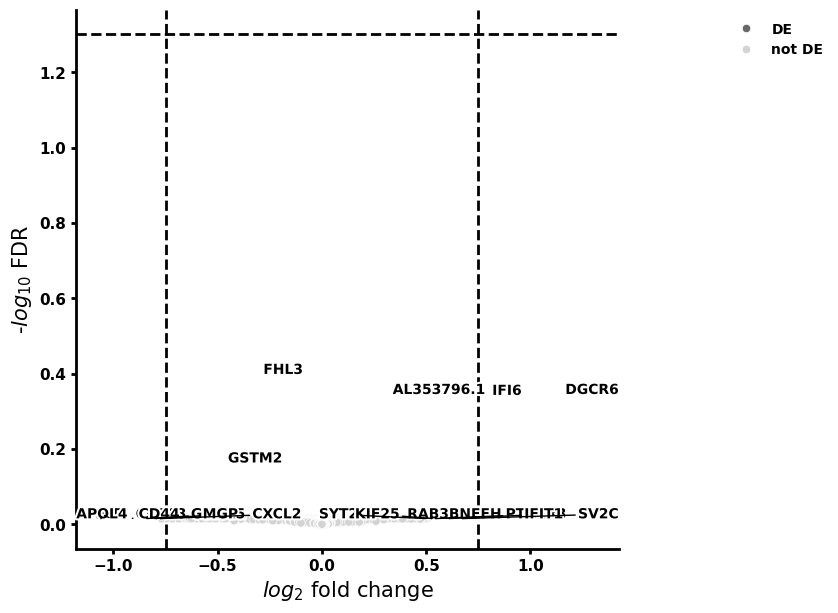

In [12]:
from sanbomics.plots import volcano

volcano(res, symbol='Symbol', to_label = 10,figsize = (7,7) )


# A_B

In [13]:
count_matrix = pd.read_csv('count_matrix_diff_analysis.csv',index_col=0)
meta_data = pd.read_csv('meta_data_diff_analysis.csv',index_col=0)
meta_data = meta_data[meta_data.condition.isin(['B','A'])]
count_matrix = count_matrix.T
count_matrix = count_matrix[count_matrix.index.isin(meta_data.index)]
#print(count_matrix)
#print(meta_data)


stat_res, dds = differential_expression_analysis(output_dir='./different_expression_output/A_B', count_matrix=count_matrix, meta_data=meta_data)

Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 1.23 seconds.

Fitting dispersion trend curve...
... done in 0.17 seconds.

Fitting MAP dispersions...
... done in 1.52 seconds.

Fitting LFCs...
... done in 0.76 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 16 outlier genes.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.

Running Wald tests...


AnnData object with n_obs × n_vars = 71 × 17330
    obs: 'condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'replace_cooks'
[0.05967565 0.0258404  0.1114767  ... 0.1010755  0.0371822  0.0371648 ]
                 intercept  condition_B_vs_A
ENSG00000182870   7.312584         -0.104660
ENSG00000039523   7.516836         -0.034014
ENSG00000198142   4.455157          0.165278
ENSG00000182366   3.516699         -0.280317
ENSG00000168490   9.254000         -0.153098
...                    ...               ...
ENSG00000143590   5.793849         -0.092156
ENSG00000134824   8

... done in 0.44 seconds.



In [14]:
res = stat_res.results_df.sort_values(by = 'padj' )
from sanbomics.tools import id_map
mapper = id_map(species = 'human')
res['Symbol'] = res.index.map(mapper.mapper) 

In [15]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000170522,381.245826,-0.345143,0.059314,-5.818951,5.921810e-09,0.000103,ELOVL6
ENSG00000153714,91.494706,-0.389987,0.081400,-4.790985,1.659646e-06,0.014381,LURAP1L
ENSG00000160712,363.692795,0.557109,0.122052,4.564529,5.006177e-06,0.028919,IL6R
ENSG00000104368,424.795879,0.528593,0.120301,4.393938,1.113158e-05,0.032152,PLAT
ENSG00000085831,142.589024,-0.436968,0.097551,-4.479369,7.486398e-06,0.032152,TTC39A
...,...,...,...,...,...,...,...
ENSG00000140153,356.596565,-0.000043,0.035273,-0.001231,9.990178e-01,0.999275,WDR20
ENSG00000101191,929.237273,-0.000042,0.042742,-0.000973,9.992235e-01,0.999397,DIDO1
ENSG00000134077,357.917267,-0.000038,0.043557,-0.000878,9.992992e-01,0.999415,THUMPD3
ENSG00000272150,31.852479,-0.000074,0.093859,-0.000787,9.993717e-01,0.999429,NBPF25P


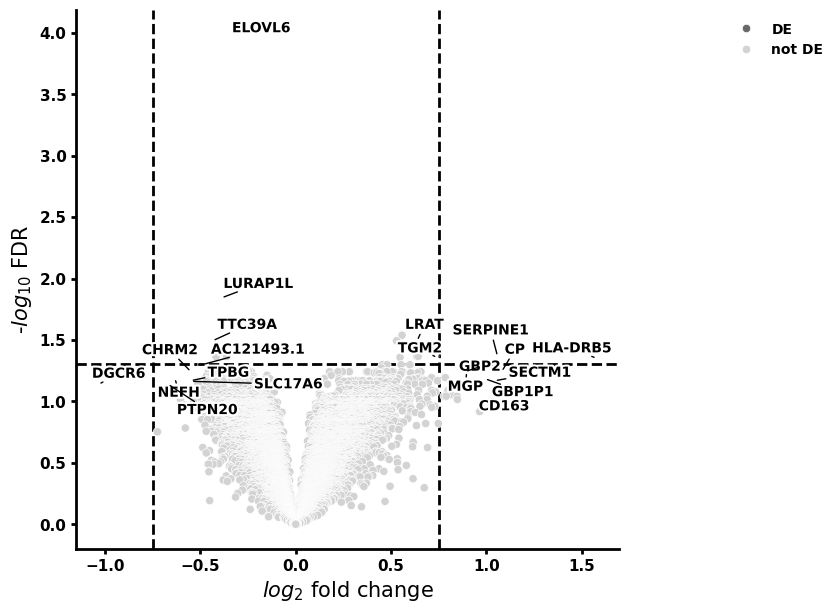

In [16]:
from sanbomics.plots import volcano

volcano(res, symbol='Symbol', to_label = 10,figsize = (7,7) )


# A_C

In [22]:
count_matrix = pd.read_csv('count_matrix_diff_analysis.csv',index_col=0)
meta_data = pd.read_csv('meta_data_diff_analysis.csv',index_col=0)
meta_data = meta_data[meta_data.condition.isin(['C','A'])]
count_matrix = count_matrix.T
count_matrix = count_matrix[count_matrix.index.isin(meta_data.index)]
#print(count_matrix)
#print(meta_data)


stat_res, dds = differential_expression_analysis(output_dir='./different_expression_output/A_C', count_matrix=count_matrix, meta_data=meta_data)

Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 1.24 seconds.

Fitting dispersion trend curve...
... done in 0.21 seconds.

Fitting MAP dispersions...
... done in 1.55 seconds.

Fitting LFCs...
... done in 0.72 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 25 outlier genes.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.

Running Wald tests...


AnnData object with n_obs × n_vars = 58 × 17330
    obs: 'condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'replace_cooks'
[0.04817718 0.02430452 0.10625288 ... 0.08853849 0.03799923 0.02456258]
                 intercept  condition_C_vs_A
ENSG00000182870   7.388507         -0.014408
ENSG00000039523   7.592886         -0.023592
ENSG00000198142   4.531006          0.140109
ENSG00000182366   3.593345         -0.012639
ENSG00000168490   9.329794         -0.052718
...                    ...               ...
ENSG00000143590   5.869696          0.012962
ENSG00000134824   8

... done in 0.42 seconds.



In [23]:
res = stat_res.results_df.sort_values(by = 'padj' )
from sanbomics.tools import id_map
mapper = id_map(species = 'human')
res['Symbol'] = res.index.map(mapper.mapper) 

In [24]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000177989,75.921218,0.965218,0.203954,4.732524,0.000002,0.038428,ODF3B
ENSG00000126709,2147.520895,0.707953,0.184413,3.838955,0.000124,0.554416,IFI6
ENSG00000162692,25.551956,1.129376,0.294850,3.830339,0.000128,0.554416,VCAM1
ENSG00000111801,205.523072,0.384129,0.099674,3.853837,0.000116,0.554416,BTN3A3
ENSG00000253678,31.349736,0.092015,0.164217,0.560327,0.575257,0.974815,AC104964.2
...,...,...,...,...,...,...,...
ENSG00000104859,2029.635269,0.000508,0.101403,0.005012,0.996001,0.999777,CLASRP
ENSG00000226380,463.345577,-0.002384,0.146981,-0.016220,0.987059,0.999777,NaN
ENSG00000214293,136.942678,0.000321,0.061196,0.005240,0.995819,0.999777,APTR
ENSG00000174007,289.959626,-0.000273,0.098703,-0.002769,0.997791,0.999777,CEP19


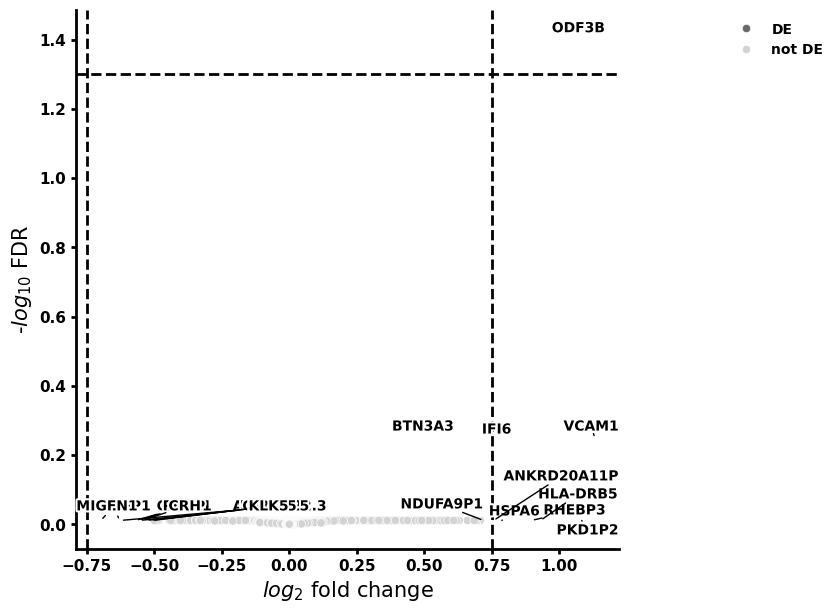

In [25]:
from sanbomics.plots import volcano

volcano(res, symbol='Symbol', to_label = 10,figsize = (7,7) )

In [ ]:
import pandas as pd
count_matrix_diff = pd.read_csv('count_matrix_diff_analysis.csv',index_col=0)
count_matrix_diff 

In [47]:
count_matrix_diff

KeyboardInterrupt: 

# Control_A

In [41]:
count_matrix = pd.read_csv('../../../../preprocessing_18_dec/count_matrix_AD_NCI_preprocessed.csv', index_col = 0)
count_matrix

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000282936,ENSG00000282951,ENSG00000283013,ENSG00000283041,ENSG00000283045,ENSG00000283050,ENSG00000283071,ENSG00000283078,ENSG00000283103,ENSG00000283108
23_120411,149,339,138,37,194,222,178,573,257,418,...,180,26,408,59,15,101,19,71,70,20
591_120522,196,384,160,30,261,380,258,810,369,605,...,189,43,644,86,26,104,50,57,58,34
691_120605,292,440,173,38,179,926,267,619,277,613,...,153,43,550,128,34,96,78,32,73,33
588_120522,302,461,149,37,141,575,169,700,328,524,...,240,32,594,71,27,113,30,67,62,18
604_120523,201,530,267,67,230,713,316,949,378,702,...,272,47,755,93,43,120,156,71,62,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677_120604,204,172,45,15,166,349,98,407,221,212,...,122,33,244,75,36,51,16,41,18,17
142_120419,156,322,125,28,157,130,165,496,253,339,...,182,13,312,40,5,67,31,37,49,23
120_120418,189,190,94,25,389,1230,144,470,233,305,...,251,64,366,120,82,117,20,44,64,49
483_120515,172,483,158,32,241,185,196,925,371,699,...,264,21,779,67,21,105,46,90,69,30


In [43]:
meta_data = pd.read_csv('meta_data_diff_analysis.csv',index_col=0)
meta_data

,condition
424_120507,B
444_120507,A
497_120515,A
232_120425,A
602_120523,C
...,...
591_120522,B
494_120515,A
197_120424,A
407_120503,A


In [46]:
count_matrix.loc[count_matrix_diff.index,]

KeyError: "None of [Index(['424_120507', '444_120507', '497_120515', '232_120425', '602_120523',\n       '545_120516', '553_120517', '711_120531', '309_120430', '520_120515',\n       '459_120514', '286_120430', '706_120605', '708_120531', '304_120430',\n       '193_120424', '568_120521', '482_120514', '942_131101', '104_120418',\n       '637_120524', '721_120531', '695_120605', '350_120501', '689_120604',\n       '705_120605', '231_120425', '254_120426', '550_120517', '173_120424',\n       '952_131107', '12_120410', '537_120516', '604_120523', '34_120416',\n       '70_120417', '427_120507', '486_120515', '321_120501', '606_120523',\n       '202_120424', '617_120524', '355_120501', '292_120430', '289_120430',\n       '703_120605', '511_120515', '628_120524', '56_120417', '243_120426',\n       '229_120425', '36_120416', '649_120529', '77_120417', '704_120605',\n       '607_120523', '280_120430', '364_120502', '237_120426', '318_120501',\n       '228_120425', '23_120411', '145_120419', '02_120405', '420_120507',\n       '384_120503', '310_120430', '929_131031', '181_120424', '429_120507',\n       '531_120516', '663_120530', '323_120501', '635_120524', '214_120425',\n       '434_120507', '24_120411', '196_120424', '630_120524', '715_120531',\n       '624_120524', '186_120424', '76_120417', '469_120514', '363_120502',\n       '326_120501', '591_120522', '494_120515', '197_120424', '407_120503',\n       '554_120517'],\n      dtype='object')] are in the [index]"